# <font color="Green">Etape 0 : Import librairies et chargement du DF</font>

In [1]:
# Import des librairies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
#Ouvrir le CSV avec Panda (nécéssite un bon PC)
df = pd.read_csv("BDD_CSV/BDD_nutri.csv",sep="\t")

/home/anthony/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,8,13,22,23,27,28,29,31,52,64) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# <font color="Green">Etape 1 : Premier nétoyage sur les Variables</font>

## <font color="purple">A. Filtre relatif aux Valeurs 'Not a Number' (NaN)</font>

In [3]:
#Nombre de colonnes
print("Il y a ",len(df.columns)," variables dans notre DataFrame")

Il y a  186  variables dans notre DataFrame


In [4]:
#Garder les colonnes avec au plus 70% de valeur Nan (sinon les variables ne sont pas exploitables)
cols_to_keep = df.columns[df.isna().mean()<0.7]

In [5]:
#Nombres de colonnes conservées après le filtre sur les NaN
print("il nous reste ",len(cols_to_keep), " variables")

il nous reste  46  variables


In [6]:
#Liste des variables conservées
cols_to_keep

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'countries', 'countries_tags', 'countries_en', 'ingredients_text',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

## <font color="purple">B. Suppression des variables inutiles</font>

In [7]:
#Suppression des Colonnes URL, Date et creator (non utiles)
useless_cols = ['url', 'creator', 'created_t', 'created_datetime','last_modified_t',
        'last_modified_datetime','image_url', 'image_small_url','image_ingredients_url',
        'image_ingredients_small_url','image_nutrition_url','image_nutrition_small_url']

In [8]:
#Mise à jour de la liste des variables à conservés
cols_to_keep = cols_to_keep.drop(useless_cols)

In [9]:
print("il reste ", len(cols_to_keep), " variables")

il reste  34  variables


In [10]:
#Mise à jour du Dataframe
df = df[cols_to_keep]
#Vérification des variables de df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985074 entries, 0 to 1985073
Data columns (total 34 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   code                                     object 
 1   product_name                             object 
 2   brands                                   object 
 3   brands_tags                              object 
 4   categories                               object 
 5   categories_tags                          object 
 6   categories_en                            object 
 7   countries                                object 
 8   countries_tags                           object 
 9   countries_en                             object 
 10  ingredients_text                         object 
 11  additives_n                              float64
 12  ingredients_from_palm_oil_n              float64
 13  ingredients_that_may_be_from_palm_oil_n  float64
 14  nutriscore_score  

## <font color="purple">C. Suppression des Variables en doublons</font>

### <font color="grey">C1. brands & brands_tags</font>

In [11]:
#Affichage des 10 premières lignes (sans Nan)
df[['brands','brands_tags']].dropna(how='any').head(20)

,brands,brands_tags
0,endives,endives
6,courte paille,courte-paille
7,Watt,watt
23,Jeff de Bruges,jeff-de-bruges
25,CROUS,crous
26,"Crous Resto',Crous","crous-resto,crous"
33,Ferme De La Frémondière,ferme-de-la-fremondiere
36,Crous,crous
41,Crous resto,crous-resto
46,Ferme t'y R'nao,ferme-t-y-r-nao


In [12]:
#Affichage de la répartitions par valeur
df[['brands','brands_tags']].value_counts()

brands         brands_tags  
Carrefour      carrefour        16258
Auchan         auchan           12180
Bonarea        bonarea           7905
U              u                 6428
Delhaize       delhaize          5677
                                ...  
LBC            lbc                  1
LB bulgaricum  lb-bulgaricum        1
LB Bulgaricum  lb-bulgaricum        1
LB             lb                   1
🤬              🤬                    1
Length: 179060, dtype: int64

In [13]:
#Les valeurs se ressemblent, on va donc vérifier le taux de remplissage
df[['brands','brands_tags']].isna().mean()

brands         0.483183
brands_tags    0.483217
dtype: float64

In [14]:
#brands présente moins de valeurs nulles, on le conserve
cols_to_keep = cols_to_keep.drop('brands_tags')

### <font color="grey">C2. categories, categories_tags, categories_en</font>

In [15]:
#Affichage des 10 premières lignes
df[['categories', 'categories_tags', 'categories_en']].dropna(how='any').head(10)

,categories,categories_tags,categories_en
6,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards"
7,Xsf,fr:xsf,fr:xsf
16,Pâtes d'amande,"en:marzipan,en:almond-paste","Marzipan,Almond paste"
17,"Plats préparés, Légumes préparés, Carottes râp...","en:meals,en:prepared-vegetables,en:grated-carr...","Meals,Prepared vegetables,Grated carrots,Seaso..."
26,"Tartes, Tartes sucrées, Tartes à la noix de coco","en:pies,en:sweet-pies,en:coconut-pies","Pies,Sweet pies,Coconut pies"
36,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
38,"Viandes, Volailles, Poulets, Aiguillettes de p...","en:meats,en:poultries,en:chickens,fr:aiguillet...","Meats,Poultries,Chickens,fr:Aiguillettes de po..."
40,"Plats préparés, Légumes préparés, Entrées, Ent...","en:meals,en:prepared-vegetables,en:starters,en...","Meals,Prepared vegetables,Starters,Cold starte..."
65,"Aliments et boissons à base de végétaux, Boiss...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan..."
66,"Produits laitiers, Produits fermentés, Produit...","en:dairies,en:fermented-foods,en:fermented-mil...","Dairies,Fermented foods,Fermented milk product..."


In [16]:
#Affichage de la répartiotions par valeur pour categories
df[['categories', 'categories_tags', 'categories_en']].value_counts()

categories                                                  categories_tags                                                                                                                                                                categories_en                                                                                                                                        
Snacks                                                      en:snacks                                                                                                                                                                      Snacks                                                                                                                                                   32704
Snacks, Sweet snacks, Confectioneries                       en:snacks,en:sweet-snacks,en:confectioneries                                                                                                                     

In [17]:
#A première vue, Categorie et Categories_en semblent les plus pertinents, vérification du taux de remplissage
df[['categories', 'categories_tags', 'categories_en']].isna().mean()

categories         0.532718
categories_tags    0.532720
categories_en      0.532720
dtype: float64

In [18]:
#categories présente moins de Nan, on supprimme les 2 autres
cols_to_keep = cols_to_keep.drop(['categories_tags', 'categories_en'])

### <font color="grey">C3. countries, countries_tags, countries_en</font>

In [19]:
#Affichage des 10 premières lignes
df[['countries', 'countries_tags', 'countries_en']].dropna(how='any').head(10)

,countries,countries_tags,countries_en
0,en:france,en:france,France
1,Spain,en:spain,Spain
2,France,en:france,France
3,France,en:france,France
4,Espagne,en:spain,Spain
5,en:es,en:spain,Spain
6,France,en:france,France
7,en:France,en:france,France
8,France,en:france,France
9,France,en:france,France


In [20]:
#Affichage de la répartitions par valeur
df[['countries', 'countries_tags', 'countries_en']].value_counts()

countries                              countries_tags                                       countries_en                           
France                                 en:france                                            France                                     434521
United States                          en:united-states                                     United States                              310422
en:fr                                  en:france                                            France                                     203845
en:es                                  en:spain                                             Spain                                      101490
en:it                                  en:italy                                             Italy                                       91874
                                                                                                                                        ...  
Corea del Sur, M

In [21]:
#On remarque rapidement que countries_en est plus pertinent, vérifions tout de même le TDR
df[['countries', 'countries_tags', 'countries_en']].isna().mean()

countries         0.003079
countries_tags    0.003082
countries_en      0.003082
dtype: float64

In [22]:
#countries est le mieux rempli de très très peu, nous conservons countrie_en car plus pertinent
cols_to_keep = cols_to_keep.drop(['countries', 'countries_tags'])

### <font color="grey">C4. states, states_tags, states_en</font>

In [23]:
#Affichage des 10 premières lignes
df[['states', 'states_tags', 'states_en']].dropna(how='any').head(10)

,states,states_tags,states_en
0,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete..."
1,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
2,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
3,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete..."
4,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
5,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
6,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
7,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete..."
8,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
9,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."


In [24]:
# Les variables d'etat semble peu pertinante, utilisées pour du traitement "administratif", on les supprimmes
cols_to_keep = cols_to_keep.drop(['states', 'states_tags', 'states_en'])

### <font color="grey">C5. main_category, main_category_en</font>

In [25]:
#Affichage des 10 premières lignes
df[['main_category', 'main_category_en']].dropna(how='any').head(10)

,main_category,main_category_en
6,en:mustards,Mustards
7,fr:xsf,fr:xsf
16,en:almond-paste,Almond paste
17,en:seasoned-shredded-carrots,Seasoned shredded carrots
26,en:coconut-pies,Coconut pies
36,en:pear-compotes,Pear compotes
38,fr:aiguillettes-de-poulet,fr:Aiguillettes de poulet
40,en:vegetables-macedoines,Vegetables macedoines
65,en:juices-and-nectars,Juices and nectars
66,en:abondance,Abondance


In [26]:
#Affichage de la répartitions par valeur
df[['main_category', 'main_category_en']].value_counts()

main_category                  main_category_en             
en:snacks                      Snacks                           32945
en:sauces                      Sauces                           16239
en:confectioneries             Confectioneries                  15463
en:biscuits                    Biscuits                         15424
en:cheeses                     Cheeses                          15053
                                                                ...  
es:dmmfmcmc                    es:dmmfmcmc                          1
es:diperz                      es:diperz                            1
es:dip-de-garbanzo-y-ajonjoli  es:dip-de-garbanzo-y-ajonjoli        1
es:dip-con-sabor-chipotle      es:dip-con-sabor-chipotle            1
zh:餅乾及蛋糕                       zh:餅乾及蛋糕                             1
Length: 31978, dtype: int64

In [27]:
#On conserve donc main_category_en qui parait plus pertinant
cols_to_keep = cols_to_keep.drop("main_category")

### <font color="grey">C6. categories, pnns_group_1, pnns_group_2 & main_category_en</font>

In [28]:
#Plusieurs variables semblent présenter le même type d'information de categorie, affichons les
df[['categories','pnns_groups_1', 'pnns_groups_2','main_category_en']].dropna(how="any").head(15)

,categories,pnns_groups_1,pnns_groups_2,main_category_en
6,"Epicerie, Condiments, Sauces, Moutardes",Fat and sauces,Dressings and sauces,Mustards
7,Xsf,unknown,unknown,fr:xsf
16,Pâtes d'amande,unknown,unknown,Almond paste
17,"Plats préparés, Légumes préparés, Carottes râp...",Composite foods,One-dish meals,Seasoned shredded carrots
26,"Tartes, Tartes sucrées, Tartes à la noix de coco",Sugary snacks,Biscuits and cakes,Coconut pies
36,"Aliments et boissons à base de végétaux, Alime...",Fruits and vegetables,Fruits,Pear compotes
38,"Viandes, Volailles, Poulets, Aiguillettes de p...",Fish Meat Eggs,Meat,fr:Aiguillettes de poulet
40,"Plats préparés, Légumes préparés, Entrées, Ent...",Composite foods,One-dish meals,Vegetables macedoines
65,"Aliments et boissons à base de végétaux, Boiss...",Beverages,Sweetened beverages,Juices and nectars
66,"Produits laitiers, Produits fermentés, Produit...",Milk and dairy products,Cheese,Abondance


In [29]:
#Vérifions en premier lieu le taux de remplissage
df[['categories','main_category_en','pnns_groups_1', 'pnns_groups_2']].isna().mean()

categories          0.532718
main_category_en    0.532720
pnns_groups_1       0.000073
pnns_groups_2       0.000072
dtype: float64

In [30]:
#pnns_groups_1 et 2 présente peu de Nan, mais attention, 
#il y a beaucoup de valeur Unknown (ce qui revient au même qu'un Nan), vérifions
df['pnns_groups_1'].value_counts()

unknown                    1228320
Sugary snacks               156662
Fish Meat Eggs              106638
Milk and dairy products      94203
Cereals and potatoes         86379
Fat and sauces               73228
Beverages                    71431
Fruits and vegetables        58801
Composite foods              56562
Salty snacks                 34700
Alcoholic beverages          18004
sugary-snacks                    2
Name: pnns_groups_1, dtype: int64

In [31]:
#taux de unknown pour pnn_group_1
df[df['pnns_groups_1'] == "unknown"].count()['pnns_groups_1']/df['pnns_groups_1'].count()

0.6188228300242326

In [32]:
#taux de unknown pour pnn_group_1
df[df['pnns_groups_2'] == "unknown"].count()['pnns_groups_2']/df['pnns_groups_2'].count()

0.6188222065037996

In [33]:
#visualisons nos colonnes sans les individus qui comporte "unknown"
pnns_groups_1_sans_unknown = df['pnns_groups_1'] != "unknown"
pnns_groups_2_sans_unknown = df['pnns_groups_2'] != "unknown"
df_no_uknown_pnn = df[pnns_groups_1_sans_unknown & pnns_groups_2_sans_unknown]
df_no_uknown_pnn[['main_category_en','pnns_groups_1', 'pnns_groups_2']].head(15)

,main_category_en,pnns_groups_1,pnns_groups_2
6,Mustards,Fat and sauces,Dressings and sauces
17,Seasoned shredded carrots,Composite foods,One-dish meals
26,Coconut pies,Sugary snacks,Biscuits and cakes
36,Pear compotes,Fruits and vegetables,Fruits
38,fr:Aiguillettes de poulet,Fish Meat Eggs,Meat
40,Vegetables macedoines,Composite foods,One-dish meals
65,Juices and nectars,Beverages,Sweetened beverages
66,Abondance,Milk and dairy products,Cheese
68,Chicken thighs,Fish Meat Eggs,Meat
69,Bagel breads,Cereals and potatoes,Bread


In [34]:
#vérifions le taux de remplissage
df_no_uknown_pnn[['main_category_en','pnns_groups_1', 'pnns_groups_2']].isna().mean()

main_category_en    0.000188
pnns_groups_1       0.000190
pnns_groups_2       0.000188
dtype: float64

In [35]:
# les catégories semblent présenter une "correlation" de remplissage
#vérifions le nombre de valeur uniques
print("main_category_en :",len(df['main_category_en'].unique()),
      "|  pnns_groups_1 :",len(df['pnns_groups_1'].unique()),
      "|  pnns_groups_2 :",len(df['pnns_groups_2'].unique()))

main_category_en : 31979 |  pnns_groups_1 : 13 |  pnns_groups_2 : 43


In [36]:
#beaucoup trop de valeurs uniques sont présentes dans main_category_en, 
#pour la suite nous allons conserver pnns_groups_1 et pnns_groups_2
cols_to_keep = cols_to_keep.drop(['main_category_en','categories'])

### <font color="grey">C7. energy-kcal_100g & energy_100g</font>

In [37]:
#Les variables 'energy-kcal_100g' et 'energy_100g' semblent présenter la même information, vérifions
df[['energy-kcal_100g','energy_100g']].dropna(how="any").head(10)

,energy-kcal_100g,energy_100g
2,375.0,1569.0
4,163.9,685.8
5,874.9,3661.0
8,21.0,88.0
9,60.0,251.0
15,63.0,264.0
17,32.0,134.0
18,129.0,540.0
21,73.0,305.0
22,222.0,929.0


In [38]:
#On remarque rapidement que 'energy_100g' = 4.184 * "energy-kcal_100g". 
#Il est donc inutile de conserver ces 2 variables
#Pour la suite nous allons conserver energy_kcal_100g (car plus courant, 
#attention l'unité est le kcal et non le gramme
cols_to_keep = cols_to_keep.drop(['energy_100g'])

### <font color="grey">C8. nutrition-score-fr_100g, nutrition_score & nutriscore_grade</font>

In [39]:
#les 3 variables nutrition-score-fr_100g, nutriscore_score et nutriscore_grade semble présenter la même information
#Affichons les
df[['nutrition-score-fr_100g','nutriscore_score', 'nutriscore_grade']].dropna(how="any").head(15)

,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade
6,18.0,18.0,d
17,1.0,1.0,b
26,14.0,14.0,d
36,-2.0,-2.0,a
40,1.0,1.0,b
66,14.0,14.0,d
68,4.0,4.0,c
69,0.0,0.0,b
72,-4.0,-4.0,a
74,15.0,15.0,d


In [40]:
#'nutrition-score-fr_100g','nutriscore_score' semblent être égaux
#Vérifions le taux de remplissage
df[['nutrition-score-fr_100g','nutriscore_score']].isna().mean()

nutrition-score-fr_100g    0.638175
nutriscore_score           0.638178
dtype: float64

In [41]:
#Nous conservons le nutrition-score-fr_100g et le nutriscore_grade
cols_to_keep = cols_to_keep.drop('nutriscore_score')

### <font color="grey">C9. Les variables mals renseignées : 'ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nova_group'</font>

In [42]:
# Ces variables présentent un gros taux de val NaN
df[['ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n', 
    'ingredients_that_may_be_from_palm_oil_n', 'nova_group']].isna().mean()

ingredients_text                           0.636282
additives_n                                0.636281
ingredients_from_palm_oil_n                0.636281
ingredients_that_may_be_from_palm_oil_n    0.636281
nova_group                                 0.682453
dtype: float64

In [43]:
#Affichons notre DF
df[['ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n', 
    'ingredients_that_may_be_from_palm_oil_n', 'nova_group']].dropna(how="any").head(15)

,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group
25,"antioxydant : érythorbate de sodium, colorant ...",5.0,0.0,0.0,4.0
33,"Lait entier, sucre, amidon de maïs, cacao, Aga...",1.0,0.0,0.0,4.0
41,"baguette Poite vin Pain baguette 50,6%: farine...",0.0,0.0,0.0,4.0
52,"Paln suédois 42,6%: farine de BLÉ, eau, farine...",2.0,0.0,0.0,4.0
58,"Taboulé 76,2%, légumes 12%, huile de colza, se...",1.0,0.0,0.0,4.0
59,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,0.0,0.0,4.0
65,"Jus et purée d'abricots (50% minimun), eau, su...",0.0,0.0,0.0,3.0
70,"pain aux 6 céréqles 61,7 % farine (farine de B...",2.0,0.0,0.0,4.0
72,"Bâguette Bressan Pain baguette 46,2%,' farine ...",3.0,0.0,0.0,4.0
141,"Chocolate stars (dehydrated cane juice, sweete...",1.0,0.0,0.0,4.0


In [44]:
#Nous n'exploiterons pas ces variables dans la suite de notre projet
cols_to_keep = cols_to_keep.drop(['ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n', 
    'ingredients_that_may_be_from_palm_oil_n', 'nova_group'])

In [45]:
#Mise à jour de notre Dataframe
df = df[cols_to_keep]

In [46]:
print("Il nous reste",len(cols_to_keep),"variables")

Il nous reste 16 variables


In [47]:
# Affichons les
df.columns

Index(['code', 'product_name', 'brands', 'countries_en', 'nutriscore_grade',
       'pnns_groups_1', 'pnns_groups_2', 'energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

## <font color="purple">D. Corrélation linéaire entre les variables</font>

<AxesSubplot:>

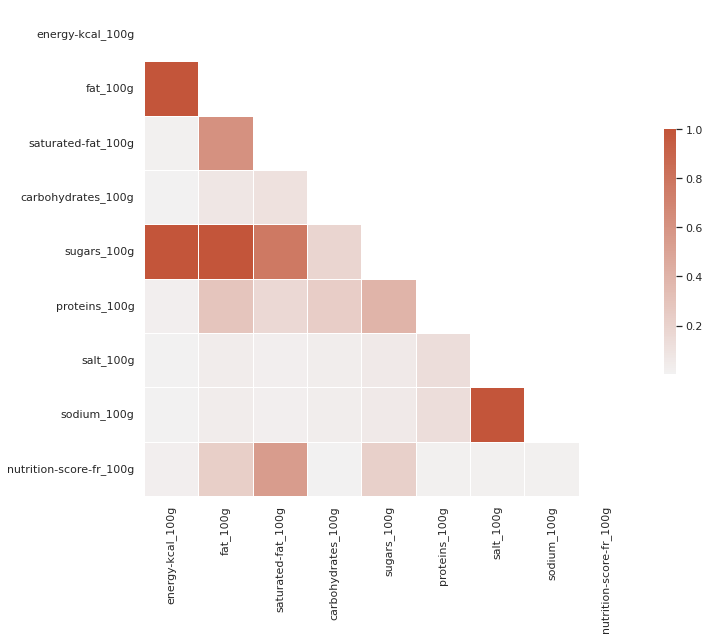

In [48]:
# colonnes dupliquées
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

<b>Les corrélations des variables ci-dessus paraissent curieuses ... </b>

Les valeurs abhérentes semblent poser un problème.

<b><font color="red">Il va donc falloir s'occupper des valeurs abhérentes afin d'exploiter la correlation linéaire !</font></b>

# <font color="Green">Etape 2 : néttoyage des individus</font>

## <font color="purple">A. Suppression des Doublons</font>

In [49]:
#La variable 'code' ne présente aucun Nan, ce qui en fait un candidat de choix pour la gestion des doublons
df[['code']].isna().mean()

code    0.0
dtype: float64

In [50]:
#Supprimmons les lignes en doublons
df = df.drop_duplicates(subset=['code'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984843 entries, 0 to 1985073
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   code                     object 
 1   product_name             object 
 2   brands                   object 
 3   countries_en             object 
 4   nutriscore_grade         object 
 5   pnns_groups_1            object 
 6   pnns_groups_2            object 
 7   energy-kcal_100g         float64
 8   fat_100g                 float64
 9   saturated-fat_100g       float64
 10  carbohydrates_100g       float64
 11  sugars_100g              float64
 12  proteins_100g            float64
 13  salt_100g                float64
 14  sodium_100g              float64
 15  nutrition-score-fr_100g  float64
dtypes: float64(9), object(7)
memory usage: 257.4+ MB


## <font color="purple">B. Valeurs abhérentes</font>

In [52]:
#Logiquement pour 100g, nous ne pouvons pas avoir des valeurs dépassants 100g,
#créons une boucle pour filtrer notre DF

#On déclare ind_nutris (i.e. sur quelles col va porter notre filtre)
ind_nutris = ['nutrition-score-fr_100g','energy-kcal_100g', 'fat_100g',
        'saturated-fat_100g', 'carbohydrates_100g',
        'sugars_100g', 'proteins_100g', 'salt_100g']

#On déclare notre boucle for
for ind in ind_nutris:
    
#Attention, il faut bien prendre en compte les NA pour éviter de supprimmer trop de ligne de notre DF  

    #Filtre nutrition-score-fr_100g
    if ind == 'nutrition-score-fr_100g':
        filter = df[ind].isna() | ((df[ind] > -15) & (df[ind] <= 40))
        
    #Filtre energy-kcal_100g       
    elif ind == 'energy-kcal_100g':
        filter = df[ind].isna() | ((df[ind] > 0) & (df[ind] <= 900))
        
    #Filtre sur les 100g      
    else :
        filter = df[ind].isna() | ((df[ind] > 0) & (df[ind] <= 100))
    
    #On filtre df
    df = df[filter]

In [53]:
#Nous allons également supprimmer les lignes avec trop de Nan par ligne (pour les variables nutri)
#filtre sur les valeurs nutri avec - de 4 Na par ligne
nutri_vars = ['energy-kcal_100g', 'fat_100g',
        'saturated-fat_100g', 'carbohydrates_100g',
        'sugars_100g', 'proteins_100g', 'salt_100g']
filtre_na_sum = df[nutri_vars].isna().sum(axis=1)<4
df=df[filtre_na_sum]

In [54]:
#Vérification
df.isna().mean(axis=0)

code                       0.000000
product_name               0.005766
brands                     0.436985
countries_en               0.001819
nutriscore_grade           0.544790
pnns_groups_1              0.000000
pnns_groups_2              0.000000
energy-kcal_100g           0.041304
fat_100g                   0.003219
saturated-fat_100g         0.014680
carbohydrates_100g         0.004209
sugars_100g                0.010251
proteins_100g              0.001501
salt_100g                  0.072819
sodium_100g                0.072821
nutrition-score-fr_100g    0.544784
dtype: float64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994307 entries, 1 to 1985068
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     994307 non-null  object 
 1   product_name             988574 non-null  object 
 2   brands                   559810 non-null  object 
 3   countries_en             992498 non-null  object 
 4   nutriscore_grade         452618 non-null  object 
 5   pnns_groups_1            994307 non-null  object 
 6   pnns_groups_2            994307 non-null  object 
 7   energy-kcal_100g         953238 non-null  float64
 8   fat_100g                 991106 non-null  float64
 9   saturated-fat_100g       979711 non-null  float64
 10  carbohydrates_100g       990122 non-null  float64
 11  sugars_100g              984114 non-null  float64
 12  proteins_100g            992815 non-null  float64
 13  salt_100g                921903 non-null  float64
 14  sod

# <font color="Green">Etape 3 : retour sur les variables</font>

## <font color="purple">A. nouvelle corrélation linéaire des variables</font>

<AxesSubplot:>

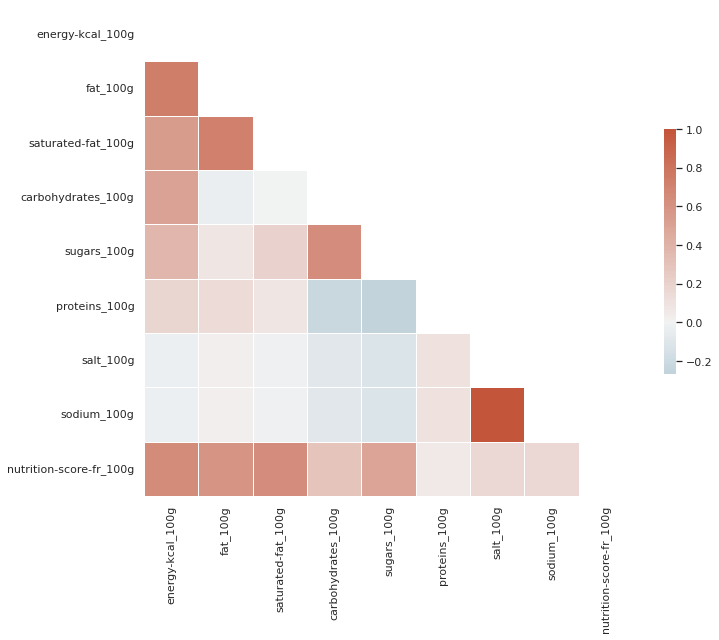

In [57]:
#colonnes dupliquées
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

<b><font color="green">Le graphique semble plus exploitable</font></b>

<b><font color = "red">On remarque une corrélation de 1 entre le sel ('salt_100g') et le sodium_100g</font></b>

## <font color="purple">B. salt_100g & sodium_100g</font>

In [58]:
#Observons ces variables (sans les NaN)
df[['salt_100g','sodium_100g']].dropna(how='any').head(10)

,salt_100g,sodium_100g
1,0.100,0.0400
2,1.400,0.5600
4,1.100,0.4400
5,2.100,0.8400
6,4.600,1.8400
9,1.150,0.4600
17,0.420,0.1680
18,0.250,0.1000
21,0.100,0.0400
22,0.678,0.2712


<b><u><font size="3">source internet</font></u></b> : </br>
Le sel est composé de chlore et de sodium, on le nomme donc aussi chlorure de sodium.</br>
Le sodium n'est donc qu'un des deux composés du sel.</br>
<b><font color="red">1g de sel contient 400 mg de sodium et 600 mg de chlore.</font></b></br>
<i><font color="grey">N.B. À l'inverse il faut 2,5 g de sel pour obtenir 1 g de sodium</font></i>

<b><u><font size ="3">Conclusion</font></u> :</br>
<font color = "red">'sodium_100g'</font> = <font color = "red">'salt_100g'</font> X <font color="green">0.4</font></b></br>

<b><font size = "4">=> Nous ne conservons donc qu'une seule des deux variables !</font></b>


In [59]:
#Nous n'utiliserons plus le Sodium à l'avenir
cols_to_keep = cols_to_keep.drop("sodium_100g")

In [60]:
#Mise à jour de notre DF
df = df[cols_to_keep]

In [61]:
print("Il nous reste",len(df.columns),"Variables")

Il nous reste 15 Variables


# <font color="Green">Etape 4 : Imputation des valeurs manquantes (avec sickit Learn)</font>

In [61]:
#Nous utilisons scikit-learn pour imputer les val nutri manquantes (machine learning)
nutri_vars = ['energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g']
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df[nutri_vars])
df.loc[:, nutri_vars] = imp_mean.transform(df[nutri_vars])

/home/anthony/.local/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [62]:
#Vérification
df.isna().mean(axis=0)

code                       0.000000
product_name               0.005766
brands                     0.436985
countries_en               0.001819
nutriscore_grade           0.544790
pnns_groups_1              0.000000
pnns_groups_2              0.000000
energy-kcal_100g           0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
proteins_100g              0.000000
salt_100g                  0.000000
nutrition-score-fr_100g    0.544784
dtype: float64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994307 entries, 1 to 1985068
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     994307 non-null  object 
 1   product_name             988574 non-null  object 
 2   brands                   559810 non-null  object 
 3   countries_en             992498 non-null  object 
 4   nutriscore_grade         452618 non-null  object 
 5   pnns_groups_1            994307 non-null  object 
 6   pnns_groups_2            994307 non-null  object 
 7   energy-kcal_100g         953238 non-null  float64
 8   fat_100g                 991106 non-null  float64
 9   saturated-fat_100g       979711 non-null  float64
 10  carbohydrates_100g       990122 non-null  float64
 11  sugars_100g              984114 non-null  float64
 12  proteins_100g            992815 non-null  float64
 13  salt_100g                921903 non-null  float64
 14  nut

# <font color="Green">Etape 5 : Enregistrer le résultat dans un .csv</font>

In [63]:
df.to_csv('Nutri_data_clean.csv', index=False, encoding='utf-8')